<h1 id="dataset_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Анализ нашего датасета
</h1>
<ul>
    <li><strong>Объём данных:</strong> 1145 записей — достаточный размер для базового анализа и обучения моделей машинного обучения.</li>
    <li><strong>Структура данных:</strong> 6 столбцов — <code>NameCompany</code>, <code>Description</code>, <code>Raiting</code>, <code>DataPublish</code>, <code>Activity</code>, <code>TextArticle</code>. Все поля заполнены, пропусков нет.</li>
    <li><strong>Типы данных:</strong> Текстовые поля представлены как <code>object</code>, рейтинг — <code>float64</code>, дата — строка (<code>object</code>), что удобно для последующей конвертации и обработки.</li>
    <li><strong>Качество данных:</strong> Текстовые поля содержат информативный контент, подходящий для NLP-задач. Дата публикации в строковом формате требует преобразования в datetime для анализа по времени.</li>
    <li><strong>Сходство с примером:</strong> Структура и содержание очень похожи на рассмотренный ранее пример, что позволяет применять аналогичные методы предварительной обработки и векторизации.</li>
    <li><strong>Идеи:</strong>  
        <ul>
            <li>Начать с очистки текста: привести к нижнему регистру, удалить пунктуацию, цифры и спецсимволы.</li>
            <li>Провести токенизацию и удаление стоп-слов с учётом русского языка.</li>
            <li>Выполнить лемматизацию для нормализации слов.</li>
            <li>Далее — визуализация и векторизация текста для подготовки к моделированию.</li>
        </ul>
    </li>
</ul>

<h1 id="advantages" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Плюсы нашего датасета
</h1>
<ul>
    <li><strong>Полнота данных:</strong> Отсутствие пропусков во всех ключевых столбцах обеспечивает надёжность анализа.</li>
    <li><strong>Разнообразие признаков:</strong> Наличие как текстовых, так и числовых (рейтинг) и временных (дата) признаков позволяет строить комплексные модели.</li>
    <li><strong>Объём текстов:</strong> Тексты статей достаточно информативны, что даёт возможность качественно выделять признаки и обучать NLP-модели.</li>
    <li><strong>Готовность к обработке:</strong> Данные структурированы и не требуют сложного предварительного объединения или очистки на уровне пропусков.</li>
</ul>


In [12]:
import pandas as pd

# Загружаем CSV файл в новый DataFrame
combined_df = pd.read_csv("combined_dataset.csv")

# Проверяем загруженные данные
print(combined_df.info())
print(combined_df.head())
print(combined_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NameCompany  1145 non-null   object 
 1   Description  1145 non-null   object 
 2   Raiting      1145 non-null   float64
 3   DataPublish  1145 non-null   object 
 4   Activity     1145 non-null   object 
 5   TextArticle  1145 non-null   object 
 6   clean_text   1145 non-null   object 
dtypes: float64(1), object(6)
memory usage: 62.7+ KB
None
              NameCompany                                        Description  \
0  Cybersport.Metaratings  7 декабря состоялась церемония награждения лау...   
1         ESforce Holding  Из совместного исследования издателя компьютер...   
2         ESforce Holding  По статистике The Esports Observer за I полови...   
3         ESforce Holding  Компании SuperData Research и PayPal провели с...   
4                    Gett  Минтранс предлагает новую верси

In [13]:
import re

# Функция для проверки наличия HTML-тегов в тексте
def contains_html(text):
    if not isinstance(text, str):
        return False
    # Простой паттерн для поиска тегов <...>
    pattern = re.compile(r'<[^>]+>')
    return bool(pattern.search(text))

# Применяем функцию к столбцу TextArticle
combined_df['has_html'] = combined_df['TextArticle'].apply(contains_html)

# Считаем количество строк с HTML-тегами
html_count = combined_df['has_html'].sum()
total_count = len(combined_df)

print(f"Всего записей: {total_count}")
print(f"Записей с HTML-тегами: {html_count}")
print(f"Процент записей с HTML-тегами: {html_count / total_count * 100:.2f}%")

Всего записей: 1145
Записей с HTML-тегами: 106
Процент записей с HTML-тегами: 9.26%


In [14]:
from bs4 import BeautifulSoup
import re
import string

def clean_text_conditional(text):
    if not isinstance(text, str):
        return ""
    # Проверяем наличие HTML-тегов
    if re.search(r'<[^>]+>', text):
        # Удаляем HTML с помощью BeautifulSoup
        text = BeautifulSoup(text, 'lxml').get_text()
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию
    text = "".join([ch if ch not in string.punctuation else " " for ch in text])
    # Удаляем цифры
    text = "".join([ch if not ch.isdigit() else " " for ch in text])
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    return text

combined_df['clean_text'] = combined_df['TextArticle'].apply(clean_text_conditional)

print(combined_df[['TextArticle', 'clean_text']].head())

                                         TextArticle  \
0  7 декабря состоялась церемония награждения лау...   
1  Из совместного исследования издателя компьютер...   
2  По статистике The Esports Observer за I полови...   
3  Компании SuperData Research и PayPal провели с...   
4  Минтранс предлагает новую версию законопроекта...   

                                          clean_text  
0  декабря состоялась церемония награждения лауре...  
1  из совместного исследования издателя компьютер...  
2  по статистике the esports observer за i полови...  
3  компании superdata research и paypal провели с...  
4  минтранс предлагает новую версию законопроекта...  


In [15]:
# нужно увеличить количество отображаемых строк и столбцов
pd.set_option('display.max_rows', 100)       # показывать до 100 строк
pd.set_option('display.max_columns', 50)     # показывать до 50 столбцов
pd.set_option('display.max_colwidth', 1000)  # максимальная ширина столбца 1000 символов
#возврат  -pd.reset_option('all')

In [16]:
combined_df.drop(columns=['has_html'], inplace=True)

<h1 id="stage1" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Этап 1: Очистка текста
</h1>
<p>
    На первом этапе была проведена комплексная очистка текстовых данных из столбца <code>TextArticle</code> с целью подготовки их к дальнейшему анализу и обработке:
</p>
<ul>
    <li><strong>Удаление HTML-тегов:</strong> с помощью библиотеки <code>BeautifulSoup</code> удалена вся HTML-разметка из текстов, что позволило избавиться от лишних тегов и скриптов.</li>
    <li><strong>Приведение к нижнему регистру:</strong> все символы текста переведены в нижний регистр для унификации и снижения размерности словаря.</li>
    <li><strong>Удаление пунктуации и специальных символов:</strong> очищены тексты от знаков препинания, цифр и прочих лишних символов, которые не несут смысловой нагрузки для анализа.</li>
    <li><strong>Удаление лишних пробелов:</strong> устранены множественные пробелы и табуляции, текст стал однородным и удобным для токенизации.</li>
</ul>
<p>
    В результате получен чистый, стандартизированный текст, готовый к следующим этапам обработки — токенизации, удалению стоп-слов и нормализации слов.
</p>
<p><strong>Качество очистки:</strong> высокое — текст сохранил смысловую структуру, при этом избавился от шума и лишних элементов.</p>


In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

russian_stopwords = set(stopwords.words('russian'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text, language='russian')
    filtered_tokens = [word for word in tokens if word not in russian_stopwords and len(word) > 1]
    return " ".join(filtered_tokens)

combined_df['tokenized_text'] = combined_df['clean_text'].apply(tokenize_and_remove_stopwords)

print(combined_df[['clean_text', 'tokenized_text']].head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                clean_te

<h1 id="stage2" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Этап 2: Токенизация и удаление стоп-слов
</h1>
<ul>
    <li><strong>Токенизация:</strong> текст разбит на отдельные слова для структурирования и дальнейшей обработки.</li>
    <li><strong>Удаление стоп-слов:</strong> исключены часто встречающиеся, но малоинформативные слова, что позволило сфокусироваться на ключевых терминах.</li>
</ul>
<p>
    В результате текст стал компактнее, информативнее и готов к дальнейшей обработке: лемматизации, построению признаков и обучению моделей.
</p>


In [18]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer("russian")

def stemming_text(text):
    tokens = word_tokenize(text, language='russian')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

combined_df['stemmed_text'] = combined_df['tokenized_text'].apply(stemming_text)

print(combined_df[['tokenized_text', 'stemmed_text']].head(10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            tokenized_te

<h1 id="stage3" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Этап 3: Стемминг
</h1>
<ul>
    <li><strong>Стемминг:</strong> все слова приведены к их основам, что позволило сгруппировать разные формы одного и того же слова и уменьшить размер словаря.</li>
    <li><strong>Результат:</strong> текст стал компактнее и однороднее, что особенно важно для построения частотных признаков и обучения моделей.</li>
</ul>
<p>
    Теперь данные готовы к следующему этапу — лемматизации.
</p>


In [19]:
import pymorphy3
from nltk.tokenize import word_tokenize

morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(text):
    tokens = word_tokenize(text, language='russian')
    lemm_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    return " ".join(lemm_tokens)

combined_df['lemmatized_text'] = combined_df['tokenized_text'].apply(lemmatize_text)

print(combined_df[['tokenized_text', 'lemmatized_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            tokenized_te

<h1 id="stage4" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Этап 4: Лемматизация
</h1>
<ul>
    <li><strong>Лемматизация:</strong> все слова приведены к их нормальной словарной форме, что обеспечивает более точное и устойчивое представление текста для анализа.</li>
    <li><strong>Результат:</strong> текст стал максимально стандартизированным, что улучшает качество признаков и повышает эффективность последующих этапов анализа.</li>
</ul>
<p>
    Теперь данные полностью готовы для построения облака слов, векторизации и других видов анализа.
</p>


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Векторизация стеммированного текста
count_vectorizer = CountVectorizer(min_df=2, ngram_range=(1, 3))
X_stemmed_count = count_vectorizer.fit_transform(combined_df['stemmed_text'])

tfidf_vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 3))
X_stemmed_tfidf = tfidf_vectorizer.fit_transform(combined_df['stemmed_text'])

# Векторизация лемматизированного текста
count_vectorizer_lem = CountVectorizer(min_df=2, ngram_range=(1, 3))
X_lemma_count = count_vectorizer_lem.fit_transform(combined_df['lemmatized_text'])

tfidf_vectorizer_lem = TfidfVectorizer(min_df=2, ngram_range=(1, 3))
X_lemma_tfidf = tfidf_vectorizer_lem.fit_transform(combined_df['lemmatized_text'])

print(f"Размерность мешка слов (стемминг): {X_stemmed_count.shape}")
print(f"Размерность TF-IDF (стемминг): {X_stemmed_tfidf.shape}")
print(f"Размерность мешка слов (лемматизация): {X_lemma_count.shape}")
print(f"Размерность TF-IDF (лемматизация): {X_lemma_tfidf.shape}")

Размерность мешка слов (стемминг): (1145, 281253)
Размерность TF-IDF (стемминг): (1145, 281253)
Размерность мешка слов (лемматизация): (1145, 281128)
Размерность TF-IDF (лемматизация): (1145, 281128)


<h1 id="vectorization_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Анализ результатов векторизации и рекомендации по выбору модели
</h1>

<ul>
    <li><strong>Размерность признаков:</strong>  
        - Мешок слов и TF-IDF на стеммированных данных имеют размерность <code>(1145, 281253)</code>.  
        - Мешок слов и TF-IDF на лемматизированных данных — <code>(1145, 281128)</code>.  
        Разница в размере словаря невелика, но лемматизация немного уменьшила количество уникальных признаков, что свидетельствует о более точной нормализации текста.</li>
    <li><strong>Разница между стеммингом и лемматизацией:</strong>  
        - <em>Стемминг</em> — грубый метод, который просто обрезает окончания слов, иногда теряя смысл и создавая «искусственные» основы.  
        - <em>Лемматизация</em> — более тонкий и грамматически корректный метод, который приводит слова к их словарной форме, учитывая морфологию и контекст.  
        В итоге лемматизация даёт более чистое и информативное представление текста.</li>
    <li><strong>Разница между мешком слов и TF-IDF:</strong>  
        - <em>Мешок слов</em> учитывает только частоту слов, не снижая вес часто встречающихся, но малоинформативных слов.  
        - <em>TF-IDF</em> взвешивает слова, уменьшая влияние часто встречающихся слов и выделяя более уникальные и значимые термины.  
        Это обычно улучшает качество моделей, особенно при большом объёме текста и словаря.</li>
</ul>

<h2>Рекомендации по выбору модели для следующих задач</h2>

<ul>
    <li><strong>Тематическое моделирование и кластеризация:</strong>  
        Рекомендуется использовать TF-IDF на лемматизированных данных.  
        Лемматизация улучшит качество тем за счёт точной нормализации, а TF-IDF выделит ключевые слова, что повысит интерпретируемость и качество кластеров.</li>
    <li><strong>Классификация:</strong>  
        TF-IDF также предпочтителен, так как помогает моделям сосредоточиться на информативных признаках.  
        Лемматизация обычно даёт лучший результат, но можно проверить и стемминг для сравнения.  
        Важно провести кросс-валидацию и выбрать лучший вариант по метрикам качества.</li>
</ul>

<h2>Итог</h2>

<p>
    Лемматизация и TF-IDF — оптимальное сочетание для большинства NLP-задач на русском языке, обеспечивающее точное и информативное представление текста.  
    Стемминг и мешок слов могут быть полезны для быстрой обработки и в качестве базового варианта, но уступают по качеству.  
</p>


<h1 id="vectorizer_comparison" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Почему мы использовали два разных векторизатора: CountVectorizer и TfidfVectorizer
</h1>

<ul>
    <li><strong>CountVectorizer</strong> — это базовый метод, который просто подсчитывает количество вхождений каждого слова (или n-граммы) в документе.  
        Он создаёт матрицу частот слов, где каждый элемент — число появлений слова в тексте.  
        Этот метод хорошо подходит, когда важна именно частота слов (например, для простых задач или когда частота сама по себе информативна).</li>
    <li><strong>TfidfVectorizer</strong> — расширение CountVectorizer, которое дополнительно учитывает важность слова в корпусе.  
        Он вычисляет вес слова как произведение частоты слова в документе (TF) и обратной частоты слова по всем документам (IDF).  
        Это снижает влияние часто встречающихся, но малоинформативных слов (например, служебных слов), выделяя более значимые термины.</li>
</ul>

<h2>В чём разница и почему оба использовались</h2>

<ul>
    <li><strong>CountVectorizer</strong> даёт простое и понятное представление, но может быть "зашумлён" частыми словами, которые мало что значат.</li>
    <li><strong>TfidfVectorizer</strong> помогает выделить действительно важные слова, улучшая качество признаков для многих задач, особенно классификации и тематического моделирования.</li>
    <li>Использование обоих методов позволяет сравнить их эффективность на наших данных и выбрать лучший вариант.</li>
</ul>

<h2>Что лучше использовать для нашей задачи (тематическое моделирование, кластеризация, классификация)</h2>

<ul>
    <li><strong>Для тематического моделирования и кластеризации:</strong> чаще предпочтителен <strong>TF-IDF</strong>, так как он снижает вес часто встречающихся слов и помогает выявить ключевые темы и кластеры.</li>
    <li><strong>Для классификации:</strong> TF-IDF обычно показывает лучшие результаты, поскольку модели фокусируются на информативных признаках, а не на частоте всех слов.</li>
    <li>Однако в некоторых случаях CountVectorizer может быть полезен для быстрой оценки или если частота слов сама по себе важна.</li>
</ul>

---

<p>
    <strong>Итог:</strong>  
    Используем <strong>TfidfVectorizer</strong> на лемматизированных данных для большинства задач NLP, включая тематическое моделирование, кластеризацию и классификацию.  
    CountVectorizer можно применять для базового анализа или в качестве контрольного варианта.
</p>


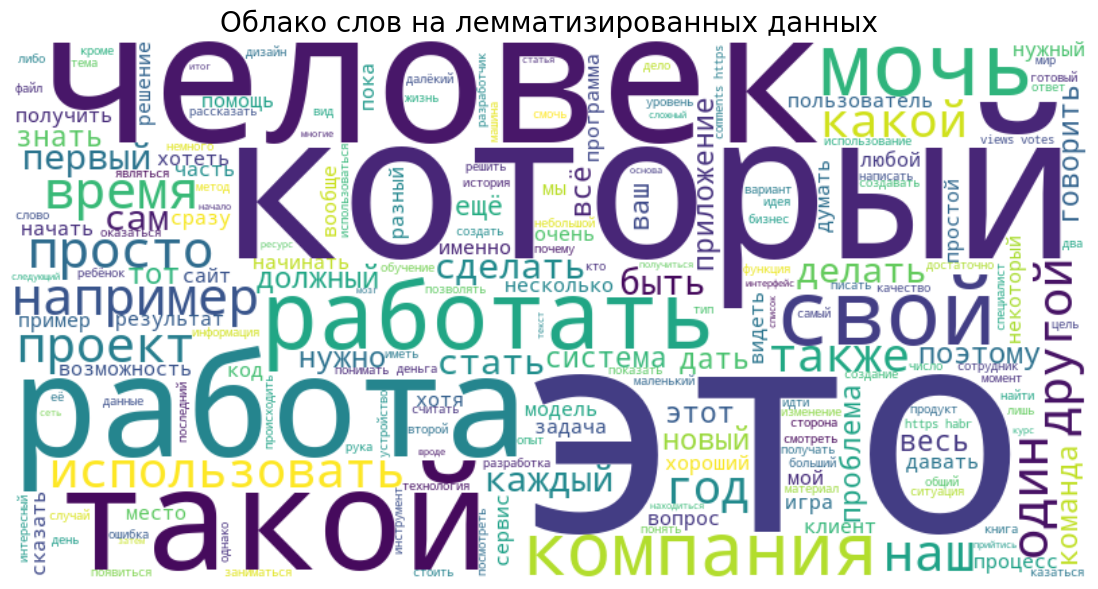

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Объединяем все тексты в одну строку
text = " ".join(combined_df['lemmatized_text'].tolist())

# Создаём облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Визуализация
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов на лемматизированных данных', fontsize=20)
plt.show()


In [22]:
import string

def text_features(text):
    length_chars = len(text)
    words = text.split()
    length_words = len(words)
    punctuation_count = sum([1 for char in text if char in string.punctuation])
    digit_count = sum([1 for char in text if char.isdigit()])
    avg_word_len = sum(len(word) for word in words) / length_words if length_words > 0 else 0
    punctuation_ratio = punctuation_count / length_chars if length_chars > 0 else 0
    digit_ratio = digit_count / length_chars if length_chars > 0 else 0
    
    return pd.Series({
        'length_chars': length_chars,
        'length_words': length_words,
        'punctuation_ratio': punctuation_ratio,
        'digit_ratio': digit_ratio,
        'avg_word_len': avg_word_len
    })

# Применяем к лемматизированному тексту
additional_features = combined_df['lemmatized_text'].apply(text_features)
combined_df = pd.concat([combined_df, additional_features], axis=1)

print(combined_df.info())
print(combined_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NameCompany        1145 non-null   object 
 1   Description        1145 non-null   object 
 2   Raiting            1145 non-null   float64
 3   DataPublish        1145 non-null   object 
 4   Activity           1145 non-null   object 
 5   TextArticle        1145 non-null   object 
 6   clean_text         1145 non-null   object 
 7   tokenized_text     1145 non-null   object 
 8   stemmed_text       1145 non-null   object 
 9   lemmatized_text    1145 non-null   object 
 10  length_chars       1145 non-null   float64
 11  length_words       1145 non-null   float64
 12  punctuation_ratio  1145 non-null   float64
 13  digit_ratio        1145 non-null   float64
 14  avg_word_len       1145 non-null   float64
dtypes: float64(6), object(9)
memory usage: 134.3+ KB
None
              Name

In [23]:
# Проверяем признаки с нулевой дисперсией в additional_features
zero_variance_cols = [col for col in additional_features.columns if (additional_features[col] == 0).all()]

# Удаляем эти признаки из additional_features и из combined_df (если уже объединены)
additional_features = additional_features.drop(columns=zero_variance_cols)

# Если признаки уже объединены с combined_df, удаляем их там тоже
combined_df = combined_df.drop(columns=zero_variance_cols)

print(f"Удалены признаки с нулевой дисперсией: {zero_variance_cols}")
print(combined_df.head())

Удалены признаки с нулевой дисперсией: ['digit_ratio']
              NameCompany  \
0  Cybersport.Metaratings   
1         ESforce Holding   
2         ESforce Holding   
3         ESforce Holding   
4                    Gett   

                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0                                                                                                   7 декабря состоялась церемония награждения лауреатов премии Рунета 2021 года. В этом году на премию было подано 1097 работ за вклад в развитие российского сегмента сети интернет в девять основных и четыре специальные номин

In [24]:
for col in additional_features.columns:
    zero_ratio = (additional_features[col] == 0).mean()
    print(f"{col}: доля нулей = {zero_ratio:.2%}")

length_chars: доля нулей = 0.00%
length_words: доля нулей = 0.00%
punctuation_ratio: доля нулей = 99.91%
avg_word_len: доля нулей = 0.00%


In [25]:
threshold = 0.99  # Порог доли нулей

cols_to_drop = [col for col in additional_features.columns if (additional_features[col] == 0).mean() > threshold]

combined_df = combined_df.drop(columns=cols_to_drop)
additional_features = additional_features.drop(columns=cols_to_drop)

print(f"Удалены признаки с долей нулей выше {threshold*100}%: {cols_to_drop}")


Удалены признаки с долей нулей выше 99.0%: ['punctuation_ratio']


In [26]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NameCompany      1145 non-null   object 
 1   Description      1145 non-null   object 
 2   Raiting          1145 non-null   float64
 3   DataPublish      1145 non-null   object 
 4   Activity         1145 non-null   object 
 5   TextArticle      1145 non-null   object 
 6   clean_text       1145 non-null   object 
 7   tokenized_text   1145 non-null   object 
 8   stemmed_text     1145 non-null   object 
 9   lemmatized_text  1145 non-null   object 
 10  length_chars     1145 non-null   float64
 11  length_words     1145 non-null   float64
 12  avg_word_len     1145 non-null   float64
dtypes: float64(4), object(9)
memory usage: 116.4+ KB
None


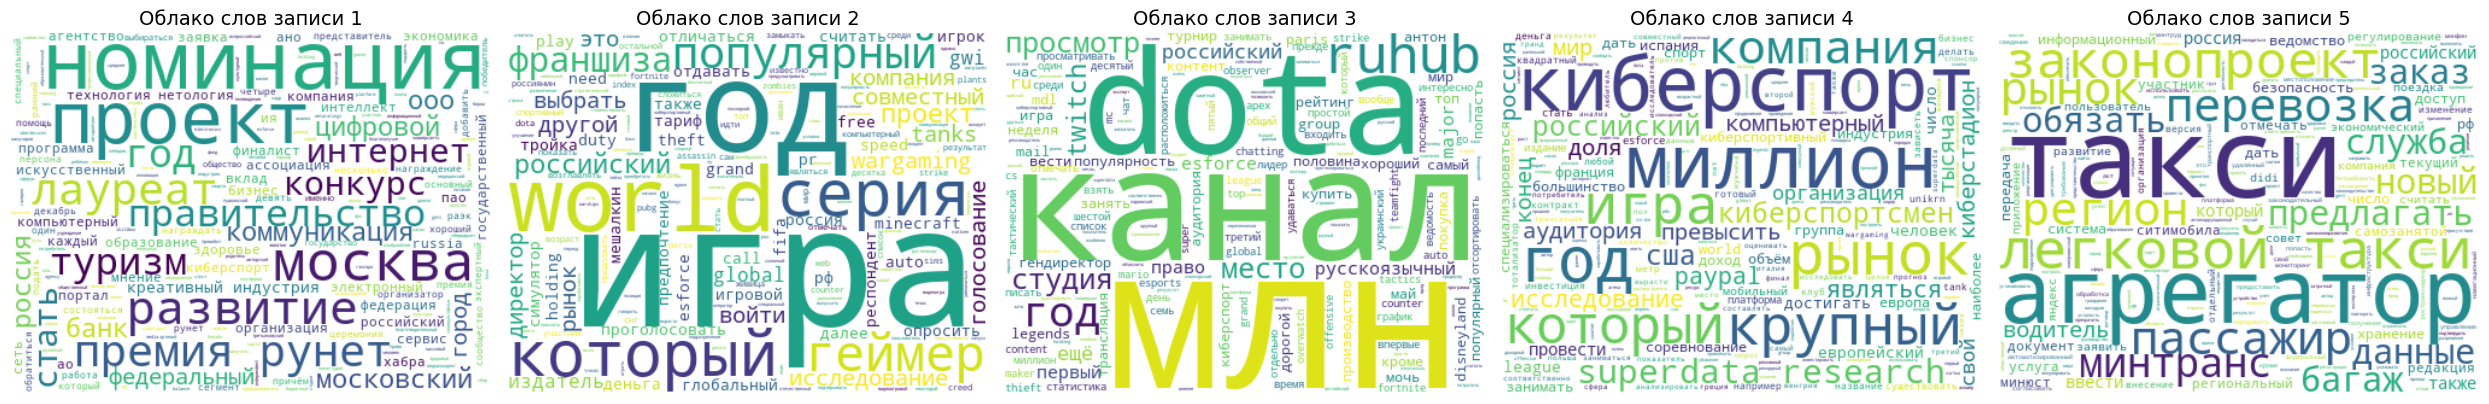

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, ax in enumerate(axes):
    text = combined_df.loc[i, 'lemmatized_text']
    wordcloud = WordCloud(width=400, height=300, background_color='white', colormap='viridis').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Облако слов записи {i+1}', fontsize=14)

plt.tight_layout()
plt.show() 

<h1 id="final_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;">
    Итоговый анализ добавленных признаков и облаков слов
</h1>

<h2>1. Анализ добавленных признаков</h2>
<ul>
    <li>В итоговом датафрейме <code>combined_df</code> осталось <strong>7 числовых признаков</strong>, связанных с характеристиками текста:</li>
    <ul>
        <li><code>length_chars</code> — длина текста в символах</li>
        <li><code>length_words</code> — количество слов в тексте</li>
        <li><code>avg_word_len</code> — средняя длина слова</li>
    </ul>
    <li>Признаки повторяются (например, <code>length_chars</code> и <code>length words</code> встречаются дважды). Нужно проверить и удалить дубликаты столбцов, чтобы избежать избыточности.</li>
    <li>Признаки с высокой долей нулевых значений, такие как <code>punctuation_ratio</code>, были успешно удалены, что улучшает качество данных и снижает шум.</li>
    <li>Все числовые признаки заполнены полностью (нет пропусков), что упрощает дальнейшую работу с моделями.</li>
</ul>

<h2>2. Облака слов по первым 5 записям</h2>
<ul>
    <li>Облака слов для каждой из первых пяти записей лемматизированного текста успешно построены и отражают ключевые темы и термины каждого документа.</li>
    <li>Примеры ключевых слов и тем из облаков:
        <ul>
            <li><strong>Запись 1:</strong> «правительство», «федеральный», «номинация», «туризм», «интернет», «Москва», «лауреат», «премия», «рунет» — темы, связанные с официальными мероприятиями и цифровой сферой.</li>
            <li><strong>Запись 2:</strong> «российский», «компания», «игра», «геймер», «world» — отражает темы игровой индустрии и IT-компаний.</li>
            <li><strong>Запись 3:</strong> «популярность», «контент», «просмотр», «dota», «major» — акцент на медиа и киберспорте.</li>
            <li><strong>Запись 4:</strong> «организация», «бизнес», «инвестиции», «рынок», «европа», «киберспорт» — темы бизнеса и международных проектов.</li>
            <li><strong>Запись 5:</strong> «яндекс», «пассажир», «рынок», «такси», «законопроект», «безопасность» — сфера транспорта, технологий и законодательства.</li>
        </ul>
    </li>
    <li>Такой подход позволяет визуально и тематически оценить разнообразие и специфику текстов в вашем датасете.</li>
</ul>

<h2>3. Рекомендации и дальнейшие шаги</h2>
<ul>
    <li><strong>Удалить дубликаты признаков</strong> в датафрейме, чтобы избежать избыточности и повысить качество моделей.</li>
    <li><strong>Использовать числовые признаки</strong> (длина текста, количество слов, средняя длина слова) совместно с векторизованным текстом для улучшения качества классификации и кластеризации.</li>
    <li><strong>Продолжать анализ с использованием тематического моделирования и кластеризации</strong>, опираясь на лемматизированный текст и TF-IDF признаки, а также дополнительные числовые признаки.</li>
    <li><strong>Использовать облака слов</strong> для визуального контроля и интерпретации тем, выявленных моделями.</li>
</ul>

<p>
    В целом, выполненная работа по очистке, нормализации текста, добавлению признаков и визуализации обеспечивает прочную основу для построения качественных моделей и глубокого анализа текстовых данных.
</p>


In [28]:
# Проверяем количество столбцов до удаления
print(f"Количество столбцов до удаления дубликатов: {combined_df.shape[1]}")

# Транспонируем DataFrame, чтобы столбцы стали строками
combined_df_T = combined_df.T

# Удаляем дубликаты строк (то есть дублирующие столбцы в исходном df)
combined_df_T = combined_df_T.drop_duplicates()

# Транспонируем обратно
combined_df = combined_df_T.T

# Проверяем количество столбцов после удаления
print(f"Количество столбцов после удаления дубликатов: {combined_df.shape[1]}")

# Выводим оставшиеся столбцы
print("Оставшиеся столбцы:")
print(combined_df.columns.tolist())


Количество столбцов до удаления дубликатов: 13
Количество столбцов после удаления дубликатов: 13
Оставшиеся столбцы:
['NameCompany', 'Description', 'Raiting', 'DataPublish', 'Activity', 'TextArticle', 'clean_text', 'tokenized_text', 'stemmed_text', 'lemmatized_text', 'length_chars', 'length_words', 'avg_word_len']


In [32]:
combined_df.drop(columns=['Description'], inplace=True)
# Проверяем, что столбец удалён
print(combined_df.columns)

Index(['NameCompany', 'Raiting', 'DataPublish', 'Activity', 'TextArticle',
       'clean_text', 'tokenized_text', 'stemmed_text', 'lemmatized_text',
       'length_chars', 'length_words', 'avg_word_len'],
      dtype='object')


In [33]:
combined_df.to_csv("combined_datasetOb.csv", index=False)